# Notebook with Raw Data (No modification techniques)

In [42]:
#Dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [43]:
emp_data=pd.read_excel('Absenteeism_at_work.xls')

In [44]:
#Seperate into two seperate categories to change the datatype
categorical_set = ["Reason for absence","Month of absence","Day of the week","Seasons","Disciplinary failure","Education","Social drinker","Social smoker"]

numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ","Hit target","Son","Pet","Weight","Height","Body mass index","Absenteeism time in hours"]

## Converting categorical_set data into category types 
for i in categorical_set :
    emp_data[i] = emp_data[i].astype("category")

for i in numerical_set :
    emp_data[i] = emp_data[i].astype("float64")  

In [45]:
emp_data.shape
emp_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26,7,3,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,4.0
1,36.0,0,7,3,1,118.0,13.0,18.0,50.0,239554.0,...,1,1,1.0,1,0,0.0,98.0,178.0,31.0,0.0
2,3.0,23,7,4,1,179.0,51.0,18.0,38.0,239554.0,...,0,1,0.0,1,0,0.0,89.0,170.0,31.0,2.0
3,7.0,7,7,5,1,279.0,5.0,14.0,39.0,239554.0,...,0,1,2.0,1,1,0.0,68.0,168.0,24.0,4.0
4,11.0,23,7,5,1,289.0,36.0,13.0,33.0,239554.0,...,0,1,2.0,1,0,1.0,90.0,172.0,30.0,2.0


# Fit Data in to (X,y)

In [46]:
X = emp_data.drop("Absenteeism time in hours", axis=1)
y = emp_data["Absenteeism time in hours"]
print(X.shape, y.shape)

(740, 20) (740,)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Linear Regression Model 1

In [48]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [50]:
model1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model1.predict(X_test)
y_predicted = np.round_(y_predicted,0)


# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")


Mean Squared Error (MSE): 111.17567567567568
R squared (R2 ): -0.020206455072560914


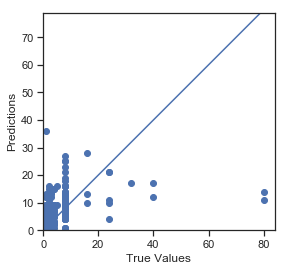

In [35]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-60, 60], [-60, 60])

# Logistic Regression Model 2

In [10]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [37]:
model2.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model2.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 247.86486486486487
R-squared (R2 ): -1.5425934817676157


# Decision Tree Model 3

In [13]:
from sklearn import tree
model3=tree.DecisionTreeClassifier()

In [38]:
model3.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model3.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 262.18918918918916
R-squared (R2 ): -1.6895321520693094


# Random Forest Model 4 (n_estimators=100)

In [40]:
from sklearn.ensemble import RandomForestClassifier
model4= RandomForestClassifier(n_estimators=100)

C:\Users\aruba\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [41]:
model4.fit(X_train, y_train)


# Use our model to predict a value
y_predicted = model4.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 108.68648648648649
R-squared (R2 ): -0.11490409198345741


# KNN Model 5 (k=35)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 0.973/0.281
k: 3, Train/Test Score: 0.593/0.292
k: 5, Train/Test Score: 0.515/0.319
k: 7, Train/Test Score: 0.459/0.292
k: 9, Train/Test Score: 0.429/0.270
k: 11, Train/Test Score: 0.422/0.308
k: 13, Train/Test Score: 0.409/0.286
k: 15, Train/Test Score: 0.396/0.308
k: 17, Train/Test Score: 0.384/0.281
k: 19, Train/Test Score: 0.373/0.265
k: 21, Train/Test Score: 0.387/0.281
k: 23, Train/Test Score: 0.368/0.259
k: 25, Train/Test Score: 0.366/0.254
k: 27, Train/Test Score: 0.364/0.281
k: 29, Train/Test Score: 0.362/0.265
k: 31, Train/Test Score: 0.355/0.259
k: 33, Train/Test Score: 0.348/0.265


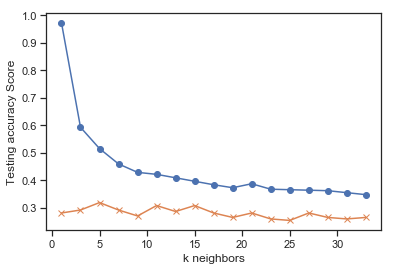

In [45]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 35, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 35, 2), train_scores, marker='o')
plt.plot(range(1, 35, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
#No need to run model as we can see only the initial data will give us a close accuracy level code below

In [ ]:
#model5=KNeighborsClassifier(n_neighbors=??)

In [ ]:
#model5.fit(X_train, y_train)
#model5.fit(X_test, y_test)

#print('k=?? Test Acc: %.3f' % model5.score(X_train, y_train))
#print('k=?? Test Acc: %.3f' % model5.score(X_test, y_test))

In [ ]:
# Calculate classification report
#from sklearn.metrics import classification_report
#predictions = model6.predict(X_test)
#print(classification_report(y_test, predictions,y=y))